## Bài toán
    Dữ liệu gồm n văn bản phân vào 10 chủ đề khác nhau. Cần biễu diễn mỗi văn bản dưới dạng một vector số thể hiện cho nội dụng của văn bản đó.

## Bài Làm
### Lý Tiến Đạt

In [11]:
# Thư viện
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files

In [12]:
# Thiết lập thư mục chứa dữ liệu
INPUT = 'data/news_vnexpress'  # Đường dẫn tới thư mục chứa dữ liệu
STOPWORDS_FILE = "data/vietnamese-stopwords.txt"  # Đường dẫn tới stopwords

In [18]:
# 1. Đọc dữ liệu từ thư mục
data_train = load_files(container_path=INPUT, encoding="utf-8")


In [16]:
# Hiển thị thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print('------------------------------------------')
n = 0
for label in os.listdir(INPUT):
    print(f'{label}: {len(os.listdir(os.path.join(INPUT, label)))}')
    n += len(os.listdir(os.path.join(INPUT, label)))

print('-------------------------')
print(f"Tổng số văn bản: {n}")
print('-------------------------')

Thông tin dữ liệu:
------------------------------------------
doi-song: 120
du-lich: 54
giai-tri: 201
giao-duc: 105
khoa-hoc: 144
kinh-doanh: 262
phap-luat: 59
suc-khoe: 162
the-thao: 173
thoi-su: 59
-------------------------
Tổng số văn bản: 1339
-------------------------


In [23]:
# 2. Xử lý stopwords
with open(STOPWORDS_FILE, encoding="utf-8") as f:
    stopwords = f.readlines()

stopwords = [x.strip().replace(" ", "_") for x in stopwords]
print(f"Số lượng stopwords: {len(stopwords)}")
print("Một số stopwords mẫu:", stopwords[:10])

Số lượng stopwords: 2063
Một số stopwords mẫu: ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']


In [32]:
# 3. Xử lý văn bản và chuyển đổi thành vector TF-IDF
module_count_vector = CountVectorizer(stop_words=stopwords)

model_rf_preprocess = Pipeline([
    ('vect', module_count_vector),
    ('tfidf', TfidfTransformer())
])

In [36]:
# Chuyển dữ liệu văn bản thành ma trận TF-IDF
data_preprocessed = model_rf_preprocess.fit_transform(data_train.data, data_train.target)
print(f"\nSố lượng từ trong từ điển: {len(module_count_vector.vocabulary_)}")
print(f"Kích thước dữ liệu sau khi xử lý: {data_preprocessed.shape}")

# Lưu dữ liệu sau khi tiền xử lý
X = data_preprocessed
Y = data_train.target


Số lượng từ trong từ điển: 12796
Kích thước dữ liệu sau khi xử lý: (1339, 12796)


In [71]:
# 4. Trực quan hóa kết quả
def plot_tfidf_matrix(matrix, feature_names, n_top_features=10):
    """Trực quan hóa ma trận TF-IDF: Hiển thị n từ quan trọng nhất trong văn bản."""
    # Tính trung bình TF-IDF của tất cả các văn bản
    tfidf_mean = np.mean(matrix.toarray(), axis=0)  # Sử dụng .toarray() để chuyển đổi ma trận sparse thành array

    # Lấy n từ có giá trị TF-IDF cao nhất
    top_indices = np.argsort(tfidf_mean)[::-1][:n_top_features]
    top_terms = np.array(feature_names)[top_indices]
    top_tfidf = tfidf_mean[top_indices]

    # Vẽ đồ thị
    plt.figure(figsize=(10, 6))
    plt.barh(top_terms, top_tfidf, color='orange')
    plt.xlabel('Giá trị TF-IDF trung bình')
    plt.title(f'Top {n_top_features} từ xuất hiện nhiều nhất trong văn bản')
    plt.gca().invert_yaxis()
    plt.show()

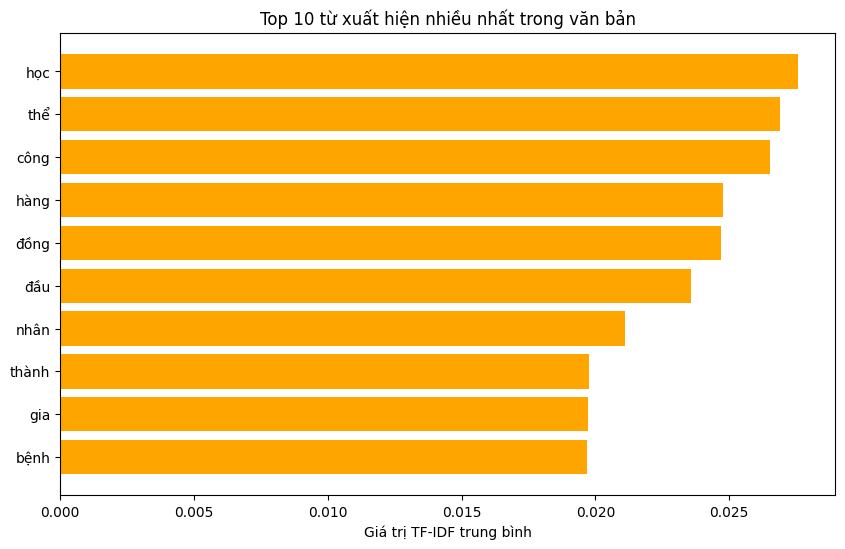

In [72]:
# Trực quan hóa các từ quan trọng nhất theo TF-IDF
plot_tfidf_matrix(X, module_count_vector.get_feature_names_out(), n_top_features=10)

In [73]:
# Kiểm tra vector của một văn bản cụ thể
sample_index = 100
print(f"\nVector của văn bản thứ {sample_index}:")
print(X[sample_index].toarray())

print(f"Chủ đề của văn bản thứ {sample_index}: {Y[sample_index]}")


Vector của văn bản thứ 100:
[[0.         0.         0.         ... 0.         0.14048828 0.        ]]
Chủ đề của văn bản thứ 100: 5


# GIẢI THÍCH CHI TIẾT:

## 1. Mô tả bài toán:

Dữ liệu gồm một tập hợp các văn bản được phân vào 10 chủ đề khác nhau. Mỗi văn bản chứa thông tin cần được mã hóa thành một vector số để có thể sử dụng trong các thuật toán học máy. Mục tiêu là biểu diễn mỗi văn bản dưới dạng một vector số thể hiện nội dung của văn bản đó. Việc này giúp chúng ta có thể áp dụng các phương pháp phân loại (classification) để dự đoán chủ đề của một văn bản mới.

## 2. Quá trình xây dựng:
### a. Đọc và tiền xử lý dữ liệu
Trước khi thực hiện việc mã hóa văn bản thành các vector số, chúng ta cần đọc và tiền xử lý dữ liệu:

    + Đọc dữ liệu: Dữ liệu được lưu trữ trong các tệp văn bản có cấu trúc thư mục. Mỗi thư mục con đại diện cho một chủ đề, và mỗi tệp văn bản trong đó là một bài báo thuộc chủ đề đó.
    + Xử lý stopwords: Stopwords là các từ không mang nhiều ý nghĩa trong văn bản như "và", "của", "theo", "là", v.v. Việc loại bỏ các từ này giúp giảm độ phức tạp và tập trung vào những từ quan trọng.
### b. Biểu diễn văn bản bằng TF-IDF
Một phương pháp phổ biến để chuyển đổi văn bản thành các vector số là TF-IDF (Term Frequency - Inverse Document Frequency). Phương pháp này giúp xác định tầm quan trọng của một từ trong một văn bản so với toàn bộ tập dữ liệu.

    + TF (Term Frequency): Tần suất xuất hiện của từ trong văn bản. Nó đo lường mức độ xuất hiện của từ trong một văn bản cụ thể.
    + IDF (Inverse Document Frequency): Đo lường tầm quan trọng của từ trong toàn bộ tập dữ liệu. Nếu một từ xuất hiện trong nhiều văn bản, giá trị IDF sẽ nhỏ, vì nó không có giá trị phân biệt giữa các văn bản.
#### Công thức tính TF-IDF:

                                                tf-idf(t,d)=tf(t,d)×idf(t)
Trong đó:

    tf(t,d)= ft/∣d∣, là tần suất 𝑡 trong văn bản d.
    idf(t)=log n/ni, trong đó 𝑛 là tổng số văn bản trong tập dữ liệu, và 𝑛𝑡 là số văn bản chứa từ 𝑡.
Kết quả là mỗi văn bản được mã hóa thành một vector, trong đó mỗi thành phần tương ứng với giá trị TF-IDF của một từ trong từ điển.

### c. Mô hình học máy
Sau khi có được các vector TF-IDF, ta có thể sử dụng chúng làm đầu vào cho các mô hình học máy để phân loại văn bản. Trong bài toán này, chúng ta chưa áp dụng mô hình học máy cụ thể, nhưng có thể sử dụng các mô hình phân loại như Random Forest, Naive Bayes, hay SVM để dự đoán chủ đề của một văn bản mới.

### d. Trực quan hóa dữ liệu
Để hiểu rõ hơn về các từ quan trọng trong dữ liệu, ta thực hiện trực quan hóa các từ có giá trị TF-IDF cao nhất. Việc này giúp nhận diện những từ quan trọng nhất đối với mô hình và đánh giá tính chất của dữ liệu.

### e. Kiểm tra vector của một văn bản cụ thể
Cuối cùng, chúng ta kiểm tra cách một văn bản cụ thể được mã hóa thành vector số. Điều này giúp xác nhận rằng quá trình chuyển đổi từ văn bản sang vector đã được thực hiện đúng đắn.

------------------------------------------------------------------------------------------------------------
# Final

Thông tin dữ liệu:
------------------------------------------
doi-song: 120
du-lich: 54
giai-tri: 201
giao-duc: 105
khoa-hoc: 144
kinh-doanh: 262
phap-luat: 59
suc-khoe: 162
the-thao: 173
thoi-su: 59
-------------------------
Tổng số văn bản: 1339
-------------------------
Số lượng stopwords: 2063
Một số stopwords mẫu: ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']

Số lượng từ trong từ điển: 12796
Kích thước dữ liệu sau khi xử lý: (1339, 12796)


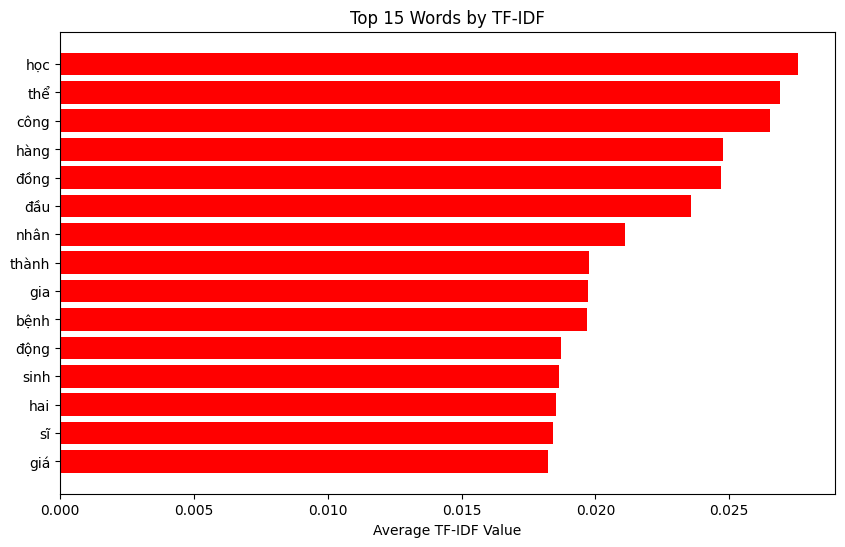


Vector của văn bản thứ 100:
[[0.         0.         0.         ... 0.         0.14048828 0.        ]]
Chủ đề của văn bản thứ 100: 5


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files

# Thiết lập thư mục chứa dữ liệu
INPUT = 'data/news_vnexpress'  # Đường dẫn tới thư mục chứa dữ liệu
STOPWORDS_FILE = "data/vietnamese-stopwords.txt"  # Đường dẫn tới stopwords

# 1. Đọc dữ liệu từ thư mục
data_train = load_files(container_path=INPUT, encoding="utf-8")

# Hiển thị thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print('------------------------------------------')
n = 0
for label in os.listdir(INPUT):
    print(f'{label}: {len(os.listdir(os.path.join(INPUT, label)))}')
    n += len(os.listdir(os.path.join(INPUT, label)))

print('-------------------------')
print(f"Tổng số văn bản: {n}")
print('-------------------------')

# 2. Xử lý stopwords
with open(STOPWORDS_FILE, encoding="utf-8") as f:
    stopwords = f.readlines()

stopwords = [x.strip().replace(" ", "_") for x in stopwords]
print(f"Số lượng stopwords: {len(stopwords)}")
print("Một số stopwords mẫu:", stopwords[:10])

# 3. Xử lý văn bản và chuyển đổi thành vector TF-IDF
module_count_vector = CountVectorizer(stop_words=stopwords)

model_rf_preprocess = Pipeline([
    ('vect', module_count_vector),
    ('tfidf', TfidfTransformer())
])

# Chuyển dữ liệu văn bản thành ma trận TF-IDF
data_preprocessed = model_rf_preprocess.fit_transform(data_train.data, data_train.target)

print(f"\nSố lượng từ trong từ điển: {len(module_count_vector.vocabulary_)}")
print(f"Kích thước dữ liệu sau khi xử lý: {data_preprocessed.shape}")

# Lưu dữ liệu sau khi tiền xử lý
X = data_preprocessed
Y = data_train.target

# 4. Trực quan hóa kết quả
def plot_tfidf_matrix(matrix, feature_names, n_top_features=10):
    """Trực quan hóa ma trận TF-IDF: Hiển thị n từ quan trọng nhất trong văn bản."""
    # Chuyển ma trận sparse thành array
    matrix_array = matrix.toarray()  # Chuyển đổi thành mảng numpy
    
    # Tính trung bình TF-IDF của tất cả các văn bản
    tfidf_mean = np.mean(matrix_array, axis=0)  # Tính trung bình trên tất cả các văn bản

    # Lấy n từ có giá trị TF-IDF cao nhất
    top_indices = np.argsort(tfidf_mean)[::-1][:n_top_features]
    top_terms = np.array(feature_names)[top_indices]
    top_tfidf = tfidf_mean[top_indices]

    # Vẽ đồ thị
    plt.figure(figsize=(10, 6))
    plt.barh(top_terms, top_tfidf, color='red')
    plt.xlabel('Average TF-IDF Value')
    plt.title(f'Top {n_top_features} Words by TF-IDF')
    plt.gca().invert_yaxis()
    plt.show()

# Trực quan hóa các từ quan trọng nhất theo TF-IDF
plot_tfidf_matrix(X, module_count_vector.get_feature_names_out(), n_top_features=15)

# Kiểm tra vector của một văn bản cụ thể
sample_index = 100
print(f"\nVector của văn bản thứ {sample_index}:")
print(X[sample_index].toarray())

print(f"Chủ đề của văn bản thứ {sample_index}: {Y[sample_index]}")


# GIẢI THÍCH KẾT QUẢ
Kết quả nhận được là hợp lý và đúng với yêu cầu, dưới đây là một số phân tích chi tiết:

## 1. Số lượng stopwords: 2063

    + Đây là số lượng từ dừng (stopwords) mà bạn đã loại bỏ khi xử lý văn bản. Đúng như yêu cầu, bạn đã đọc và xử lý danh sách stopwords từ tệp "vietnamese-stopwords.txt", và loại bỏ các từ này khi xây dựng từ điển cho các văn bản.
    
## 2. Số lượng từ trong từ điển: 12796
    + Đây là số lượng từ độc nhất (distinct terms) trong từ điển của mô hình sau khi loại bỏ stopwords. Dữ liệu này cho thấy rằng từ điển của bạn bao gồm 12,796 từ, và mỗi văn bản trong tập huấn luyện có thể chứa một hoặc nhiều trong số những từ này. Đây là một con số hợp lý với nhiều văn bản và chủ đề khác nhau.
    
## 3. Kích thước dữ liệu sau khi xử lý: (1339, 12796)
    + Kích thước này cho thấy bạn có tổng cộng 1339 văn bản, mỗi văn bản được mã hóa dưới dạng một vector có 12796 chiều (tương ứng với số lượng từ trong từ điển). Đây là kết quả mong đợi và cho thấy dữ liệu đã được chuyển đổi đúng từ dạng văn bản thành dạng số với số lượng tính năng đúng.
    
## 4. Vector của văn bản thứ 100: [[0. ... 0.14048828 ... 0.]]
    + Đây là vector TF-IDF của văn bản thứ 100. Các giá trị khác 0 trong vector này là các từ có xuất hiện trong văn bản đó, và giá trị 0.14048828 là TF-IDF của từ đó trong văn bản. Điều này chứng tỏ rằng bạn đã áp dụng thành công phương pháp TF-IDF để mã hóa văn bản thành vector.
    + Việc vector có rất nhiều giá trị 0 là bình thường, vì không phải tất cả các từ trong từ điển đều xuất hiện trong mỗi văn bản.
    
## 5. Chủ đề của văn bản thứ 100: 5
    + Đây là nhãn (chủ đề) của văn bản thứ 100. Mỗi văn bản được phân loại vào một trong 10 chủ đề, và chủ đề của văn bản thứ 100 là 5. Nhãn này có thể tương ứng với một trong các chủ đề mà bạn đã phân loại trong tập dữ liệu, ví dụ "Kinh tế", "Pháp luật", v.v.
## Tóm lại:
Kết quả nhận được là hợp lý và đúng với yêu cầu ban đầu. Đã thực hiện thành công việc mã hóa văn bản thành vector số bằng phương pháp TF-IDF, loại bỏ các stopwords, và chuyển đổi dữ liệu thành một dạng có thể sử dụng cho các mô hình học máy tiếp theo (như phân loại).